<h2> PROYECTO - Aprendizaje No Supervisado<h2>

<h2>Integrantes:<h2>
<h3>- Maximiliano Zapater Cornejo<h3>
<h3>- Javiera Vukasovic Figueroa<h3>
<h3>- Sebastián Silva Espinoza<h3>
<h3>- Glen Restrepo Arteaga<h3>
<h3>- Marco Gutiérrez Corvalán<h3>

Utilizaremos un dataset para estimación de los niveles de obesidad según los hábitos alimenticios y condiciones físicas en 2111 personas de Colombia, Perú y México. 

**El dataset contiene los siguientes atributos**:

* Gender (*binario*): Género [*Female/Male*]

* Age (*numérico continuo*): Edad 
* Height (*numérico continuo*): Altura [*metros*]
* Weight (*numérico continuo)*: Peso [*kilogramos*]
* Family history with overweight (*binario*): ¿Algún miembro de la familia ha sufrido o sufre de sobrepeso?
* FAVC (*binario*): ¿Comes alimentos altos en calorías frecuentemente?
* FCVC (*numérico entero*): ¿Usualmente comes vegetales en tus comidas principales? [*Never/Sometimes/Always*]
* NCP (*numérico continuo*): ¿Cuántas comidas principales consumes diariamente? [*Between 1 and 2/Three/More than three*]
* CAEC (*categórica*): ¿Comes algún alimento entre comidas principales? [*No/Sometimes/Frequently/Always*]
* SMOKE (*binario*): ¿Fumas?
* CH2O (*numérico continuo*): ¿Cuánta agua bebes diariamente? [*Less than a liter/Between 1 and 2L/More than 2L*]
* SCC (*binario*): ¿Monitoreas las calorías que consumes diariamente?
* FAF (*numérico continuo*): ¿Qué tan seguido realizas actividad física? [*I do not have/1 or 2 days/2 or 4 days/4 or 5 days*]
* TUE (*numérico entero*): ¿Cuánto tiempo usas aparatos electrónicos tales como celular, videojuegos, televisión, computadora u otros?
* CALC (*categórica*): ¿Qué tan seguido bebes alcohol? [*I do not drink/Sometimes/Frequently/Always*]
* MTRANS (*categórica*): ¿Qué medio de transporte sueles utilizar? [*Automobile/Motorbike/Bike/Public Transportation/Walking*]

<h3> Análisis Estadístico <h3>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')

df_obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_obesity.drop(columns = ['NObeyesdad'], inplace = True)
display(df_obesity.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [19]:
embedding = pd.get_dummies(df_obesity[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])
embedding = embedding.astype(int)

df_obesity.drop(columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], inplace = True)
df_obesity = pd.concat([df_obesity, embedding], axis = 1)
df_obesity.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [24]:
df_obesity_scaled = pd.DataFrame(scale(df_obesity))
df_obesity_scaled.columns = df_obesity.columns
round(df_obesity_scaled.describe(), 3)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,...,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000,2111.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.625,-2.698,-1.817,-2.658,-2.167,-1.645,-1.188,-1.081,-0.988,-1.012,...,-0.218,-0.022,-0.185,-1.405,-0.659,-0.526,-0.058,-0.072,-1.725,-0.165
25%,-0.688,-0.768,-0.806,-0.785,-0.035,-0.691,-1.042,-1.081,-0.988,-1.012,...,-0.218,-0.022,-0.185,-1.405,-0.659,-0.526,-0.058,-0.072,-1.725,-0.165
50%,-0.242,-0.013,-0.137,-0.063,0.404,-0.013,-0.012,-0.053,-0.988,0.988,...,-0.218,-0.022,-0.185,0.712,-0.659,-0.526,-0.058,-0.072,0.580,-0.165
75%,0.266,0.716,0.796,1.088,0.404,0.766,0.772,0.562,1.012,0.988,...,-0.218,-0.022,-0.185,0.712,1.518,-0.526,-0.058,-0.072,0.580,-0.165
max,5.783,2.984,3.300,1.088,1.690,1.619,2.340,2.205,1.012,0.988,...,4.581,45.935,5.400,0.712,1.518,1.902,17.337,13.817,0.580,6.058


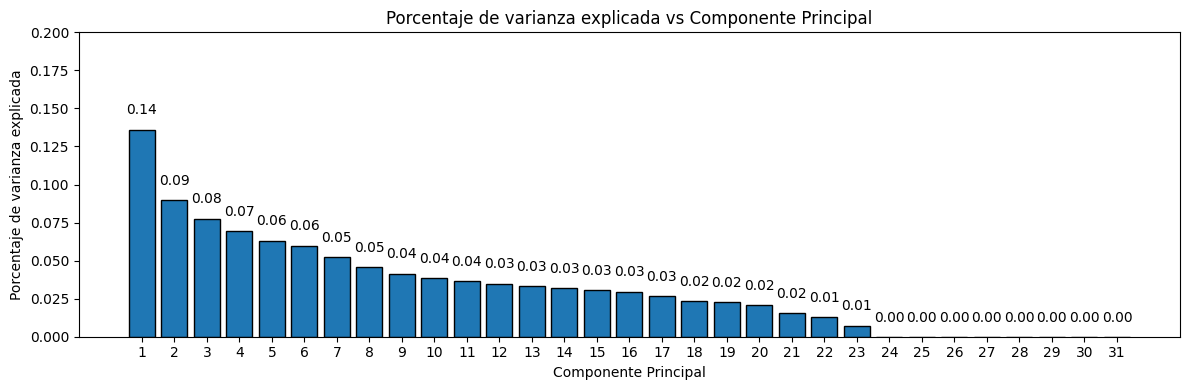

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_obesity)

df_obesity_pca = pca_pipe.named_steps['pca']

n_componentes = np.arange(df_obesity_pca.n_components_) + 1
varianza_expl = df_obesity_pca.explained_variance_ratio_

## Determinamos el porcentaje de varianza explicada por las distintas componentes principales y graficamos
n_componentes = np.arange(df_obesity_pca.n_components_) + 1
varianza_expl = df_obesity_pca.explained_variance_ratio_

plt.figure(figsize = (12, 4))
plt.bar(x = n_componentes, height = varianza_expl, edgecolor = 'black')
plt.xticks(ticks = n_componentes)
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl[i] + 0.01, s = f'{varianza_expl[i]:.2f}', ha = 'center')
    
plt.title('Porcentaje de varianza explicada vs Componente Principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

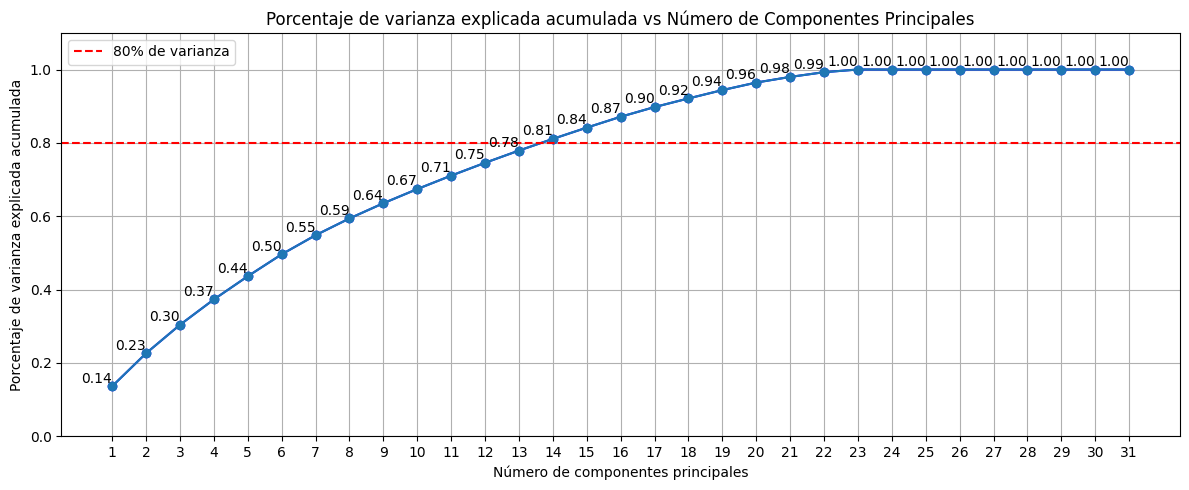

In [45]:
## Determinamos el porcentaje de la varianza explicada acumulada
varianza_expl_acum = df_obesity_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (12, 5))
plt.plot(n_componentes, varianza_expl_acum, marker = 'o', color = 'blue')
plt.plot(range(1, len(varianza_expl_acum)+1), varianza_expl_acum, marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% de varianza')
plt.title('Porcentaje de varianza explicada acumulada vs Número de Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl_acum[i] + 0.01, s = f'{varianza_expl_acum[i]:.2f}', ha = 'right')

plt.xticks(ticks = n_componentes)
plt.legend()
plt.grid()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

In [48]:
# Copiar el DataFrame original (sin dummies)
df_encoded = df_obesity.copy()

# Lista de columnas categóricas
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Codificación por frecuencia
for col in cat_cols:
    freq = df_encoded[col].value_counts(normalize=True)  # frecuencia relativa
    df_encoded[col + '_freq'] = df_encoded[col].map(freq)

# Eliminar las columnas categóricas originales si querés
df_encoded.drop(columns=cat_cols, inplace=True)

# Mostrar el resultado
df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_freq,family_history_with_overweight_freq,FAVC_freq,CAEC_freq,SMOKE_freq,SCC_freq,CALC_freq,MTRANS_freq
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0.494079,0.817622,0.116059,0.836097,0.979157,0.954524,0.302700,0.748460
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0.494079,0.817622,0.116059,0.836097,0.020843,0.045476,0.663667,0.748460
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.505921,0.817622,0.116059,0.836097,0.979157,0.954524,0.033160,0.748460
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0.505921,0.182378,0.116059,0.836097,0.979157,0.954524,0.033160,0.026528
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0.505921,0.182378,0.116059,0.836097,0.979157,0.954524,0.663667,0.748460


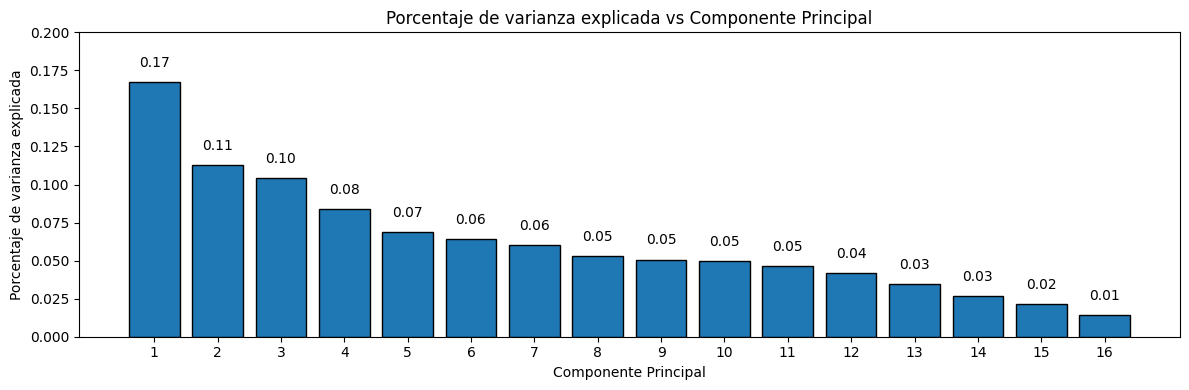

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_encoded)

df_obesity_pca = pca_pipe.named_steps['pca']

n_componentes = np.arange(df_obesity_pca.n_components_) + 1
varianza_expl = df_obesity_pca.explained_variance_ratio_

## Determinamos el porcentaje de varianza explicada por las distintas componentes principales y graficamos
n_componentes = np.arange(df_obesity_pca.n_components_) + 1
varianza_expl = df_obesity_pca.explained_variance_ratio_

plt.figure(figsize = (12, 4))
plt.bar(x = n_componentes, height = varianza_expl, edgecolor = 'black')
plt.xticks(ticks = n_componentes)
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl[i] + 0.01, s = f'{varianza_expl[i]:.2f}', ha = 'center')
    
plt.title('Porcentaje de varianza explicada vs Componente Principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

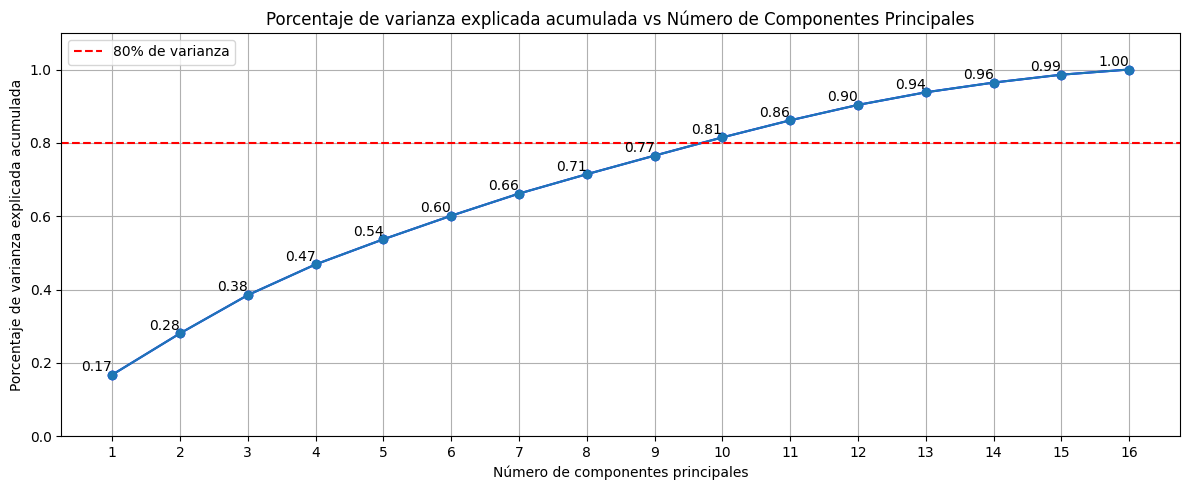

In [50]:
## Determinamos el porcentaje de la varianza explicada acumulada
varianza_expl_acum = df_obesity_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (12, 5))
plt.plot(n_componentes, varianza_expl_acum, marker = 'o', color = 'blue')
plt.plot(range(1, len(varianza_expl_acum)+1), varianza_expl_acum, marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% de varianza')
plt.title('Porcentaje de varianza explicada acumulada vs Número de Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
for i in range(len(n_componentes)):
    plt.text(x = n_componentes[i], y = varianza_expl_acum[i] + 0.01, s = f'{varianza_expl_acum[i]:.2f}', ha = 'right')

plt.xticks(ticks = n_componentes)
plt.legend()
plt.grid()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()